In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams['font.sans-serif'] = 'SimHei'

### 定义目标分布以及生成数据

(1000,)


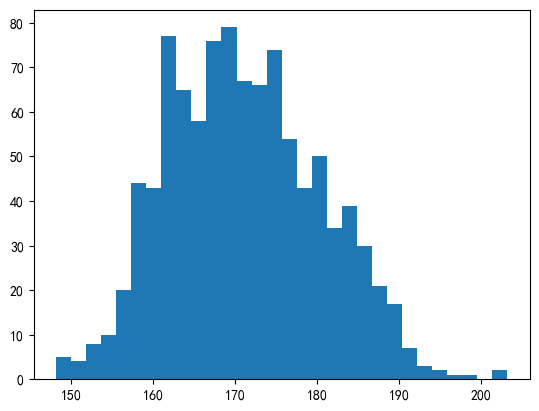

In [89]:
np.random.seed(666)
male = np.random.normal(176, 8,(600, ))
female = np.random.normal(164, 6,(400, ))
height = np.hstack((male, female))
print(height.shape)
plt.hist(height, bins=30)
plt.show()


### 定义模型函数

In [90]:
def EM_GMM(x, n_samples=1000, k=2):
    pi = np.ones((k, )) / k
    miu = np.random.uniform(150, 180, (k, ))
    sigma = np.random.uniform(5, 10, (k, ))
    omiga = np.zeros((n_samples, k))
    for epochs in range(30):
        #迭代操作
        #初步想法：不保存中间变量了，每个参数只设一个变量，直接在循环里迭代
        #循环算omiga
        for i in range(n_samples):
            sum = 0
            for j in range(k):
                omiga[i][j] = pi[j] * norm.pdf(x[i], miu[j], sigma[j])
                sum = sum + omiga[i][j]
            for j in range(k):
                omiga[i][j] = omiga[i][j] / sum
        #更新参数
        sum_omiga = np.zeros((k, ))
        sum_x_omiga = np.zeros((k, ))
        for j in range(k):
            for i in range(n_samples):
                sum_omiga[j] = sum_omiga[j] + omiga[i][j]
                sum_x_omiga[j] = sum_x_omiga[j] + omiga[i][j] * x[i]
        for j in range(k):
            pi[j] = sum_omiga[j] / n_samples
            miu[j] = sum_x_omiga[j] / sum_omiga[j]
        for j in range(k):
            sum = 0
            for i in range(n_samples):
                sum = sum + omiga[i][j] * (x[i] - miu[j]) ** 2
            sigma[j] = np.sqrt(sum / sum_omiga[j])
    return pi, miu, sigma


def predicted_pdf(x, pi, miu, sigma):
    k = len(pi)
    sum = 0
    for i in range(k):
        sum = sum + pi[i] * norm.pdf(x, miu[i], sigma[i])
    return sum
        

### 输出结果以及可视化表达

weight = [0.39973408 0.60026592]
average = [164.04154896 175.7892246 ]
standard deviation = [5.71203936 8.06707288]


C:\Users\Wangxinchao\AppData\Local\Temp\ipykernel_9568\320027459.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


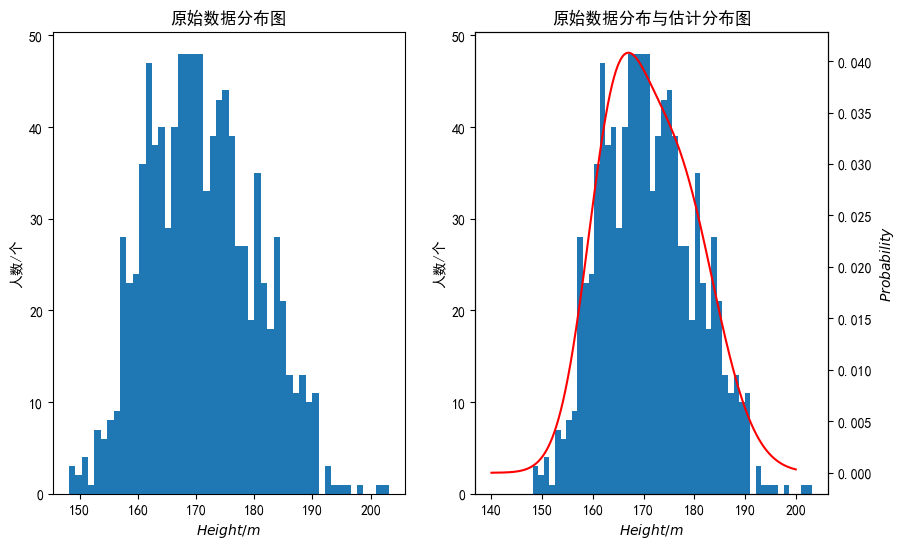

In [91]:
pi, miu, sigma = EM_GMM(height)
print("weight = {}".format(pi))
print("average = {}".format(miu))
print("standard deviation = {}".format(sigma))

x = np.linspace(140, 200, 1000)
height_predicted = predicted_pdf(x, pi, miu, sigma)
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(height, bins=50)
ax1.set_title("原始数据分布图")
ax1.set_xlabel("$Height/m$")
ax1.set_ylabel("人数/个")
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(height, bins=50)
ax2.set_title("原始数据分布与估计分布图")
ax2.set_xlabel("$Height/m$")
ax2.set_ylabel("人数/个")
ax3 = ax2.twinx()
ax3.plot(x, height_predicted, color='red')
ax3.set_xlabel("$Height/m$")
ax3.set_ylabel("$Probability$")
fig.show()
fig.savefig("result.png")
